<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/Thesi_analysis_densenet_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
import pandas as pd
import os, cv2, random, pickle
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, MaxPool2D, SeparableConv2D, BatchNormalization
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from matplotlib.colors import LogNorm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# train_folder= '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/train'
# val_folder = '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/val'
# test_folder = '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test'

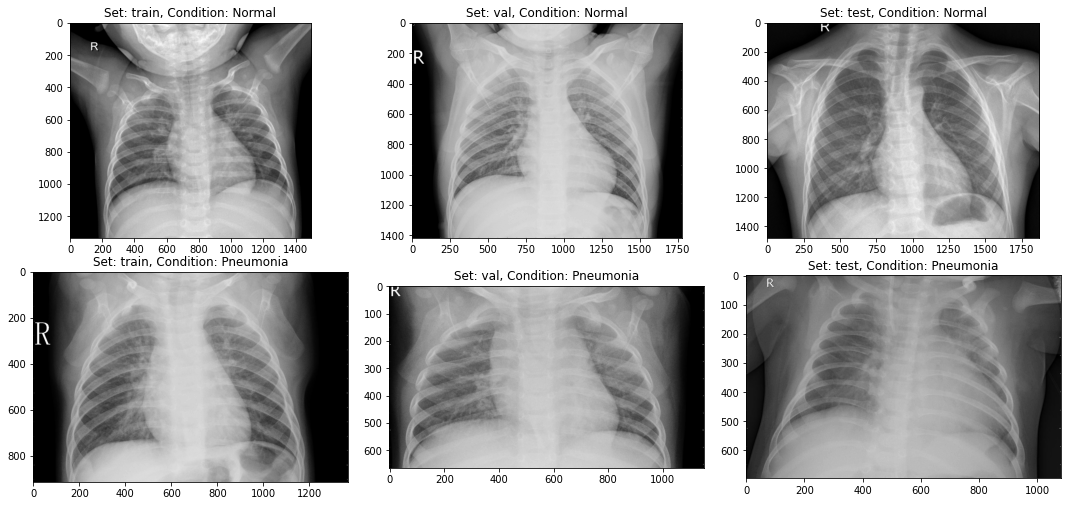

In [3]:
input_path = '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

In [4]:
size = 224
training_data = []
#create import function 
def image_import (img_path, class_type, appended_list):
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
        try:
            img = cv2.imread(read_path)
            img = cv2.resize(img, (size, size))
            appended_list.append([img, class_type])
        except Exception as e:
            print(f'Image error: {i}')
            pass


In [5]:
#import normal lung images
img_path = '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/train/NORMAL'
image_import(img_path, 0, training_data)
#import pneumonia images
img_path = '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/train/PNEUMONIA'
image_import(img_path,1, training_data)

In [6]:
#shuffle training data
random.shuffle(training_data)
np.shape(training_data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(5240, 2)

In [7]:
#seperate XY
features = []
targets = []

for f, t in training_data:
    features.append(f)
    targets.append(t)

X = np.array(features).reshape(-1, size, size, 3)
Y = np.array(targets)

In [8]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        validation_split=0.2,
        brightness_range=[0.2,1.0],)
test_img = datagen.flow(
    X,
    Y,
    subset="training")
val_img = datagen.flow(
    X,
    Y,
    subset="validation")

DenseNEt201

In [9]:
INPUT_SHAPE = (224,224,3)

base_model=tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE
)
last = base_model.get_layer('conv5_block32_concat').output
x = layers.GlobalAveragePooling2D()(last)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
pred = layers.Dense(1, activation = 'sigmoid')(x)

74842112/74836368 [==============================] - 1s 0us/step


In [10]:
import keras
model = keras.engine.Model(base_model.input, pred)
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.0009),metrics=['accuracy'])

CNN model

In [ ]:
# inputs = Input(shape=(size, size, 3))

# # First conv block
# x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
# x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# # Second conv block
# x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# # Third conv block
# x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)

# # Fourth conv block
# x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.2)(x)
# # Fifth conv block
# x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.2)(x)
# # Six conv block
# x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.2)(x)
# # # Seventh conv block
# # x = SeparableConv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='same')(x)
# # x = SeparableConv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)
# # x = MaxPool2D(pool_size=(2, 2))(x)
# # x = Dropout(rate=0.2)(x)
#  FC layer
# x = Flatten()(x)
# # x = Dense(units=1024, activation='relu')(x)
# # x = Dropout(rate=0.7)(x)
# x = Dense(units=512, activation='relu')(x)
# x = Dropout(rate=0.5)(x)
# x = Dense(units=128, activation='relu')(x)
# x = Dropout(rate=0.2)(x)
# x = Dense(units=64, activation='relu')(x)
# x = Dropout(rate=0.3)(x)
# # # x = Dense(units=32, activation='relu')(x)
# # x = Dropout(rate=0.3)(x)
# # x = Dense(units=16, activation='relu')(x)
# # x = Dropout(rate=0.3)(x)
# # Output layer
# output = Dense(units=1, activation='sigmoid')(x)

# # Creating model and compiling
# model = Model(inputs=inputs, outputs=output)
# model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', 
#               metrics=['accuracy'])


In [ ]:
# model.summary()

In [11]:
history = model.fit(
    test_img,
    validation_data=val_img,
    epochs=25,
    batch_size = 256)

Epoch 1/25
131/131 [==============================] - 149s 710ms/step - loss: 0.3000 - accuracy: 0.8573 - val_loss: 1.4869 - val_accuracy: 0.8073
Epoch 2/25
131/131 [==============================] - 87s 666ms/step - loss: 0.1511 - accuracy: 0.9469 - val_loss: 0.1556 - val_accuracy: 0.9303
Epoch 3/25
131/131 [==============================] - 88s 667ms/step - loss: 0.1263 - accuracy: 0.9535 - val_loss: 0.2068 - val_accuracy: 0.9246
Epoch 4/25
131/131 [==============================] - 87s 665ms/step - loss: 0.1117 - accuracy: 0.9616 - val_loss: 0.3857 - val_accuracy: 0.9179
Epoch 5/25
131/131 [==============================] - 88s 667ms/step - loss: 0.1097 - accuracy: 0.9640 - val_loss: 0.3227 - val_accuracy: 0.8807
Epoch 6/25
131/131 [==============================] - 88s 668ms/step - loss: 0.0995 - accuracy: 0.9643 - val_loss: 0.1298 - val_accuracy: 0.9504
Epoch 7/25
131/131 [==============================] - 87s 666ms/step - loss: 0.0858 - accuracy: 0.9690 - val_loss: 2.2209 - val_a

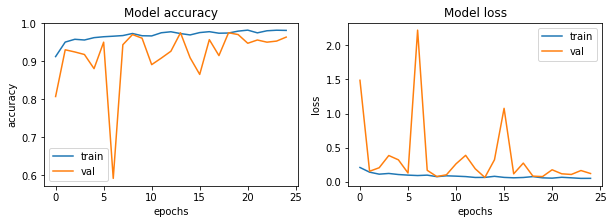

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [16]:
#import normal lung images
testing_data=[]
img_path = '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/NORMAL'
image_import(img_path, 0, testing_data)
#import pneumonia images
img_path = '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/PNEUMONIA'
image_import(img_path,1, testing_data)

In [17]:
#seperate testing to XY
test_features = []
test_targets = []

for f, t in testing_data:
    test_features.append(f)
    test_targets.append(t)

test_features = np.array(test_features).reshape(-1, size, size, 3)
test_targets = np.array(test_targets)   
test_features = test_features/255

In [19]:
np.shape(test_features)

(629, 224, 224, 3)

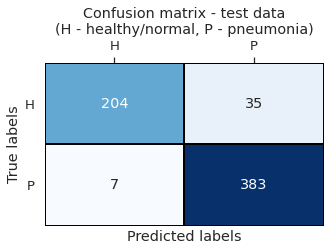

\performance metrics ----------------------
Accuracy: 93.32273449920508%
Precision: 91.6267942583732%
Recall: 98.2051282051282%
F1-score: 94.80198019801979

TRAIN METRIC ----------------------
Train acc: 98.14


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
def summary_pred(x,y,thr):
    preds = model.predict(x)
    
    acc = accuracy_score(y, preds >thr)*100
    cm = confusion_matrix(y, preds>thr)
    tn, fp, fn, tp = cm.ravel()
# plot confusion matrix as heatmap
    plt.figure(figsize=(5,3))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, xticklabels=['H', 'P'], 
                 yticklabels=['H', 'P'], cbar=False, cmap='Blues',
                 linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix - test data\n(H - healthy/normal, P - pneumonia)')
    plt.show()

    print('\performance metrics ----------------------')
    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    print('Accuracy: {}%'.format(acc))
    print('Precision: {}%'.format(precision))
    print('Recall: {}%'.format(recall))
    print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

    print('\nTRAIN METRIC ----------------------')
    print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))
# threshold greater than 0.5
summary_pred(test_features,test_targets,0.5)

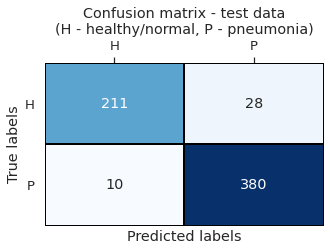

\performance metrics ----------------------
Accuracy: 93.95866454689984%
Precision: 93.13725490196079%
Recall: 97.43589743589743%
F1-score: 95.23809523809523

TRAIN METRIC ----------------------
Train acc: 98.14


In [23]:
# threshold greater than 0.75
summary_pred(test_features,test_targets,0.75)

threshold greater than 0.995 reduce false positive to zero

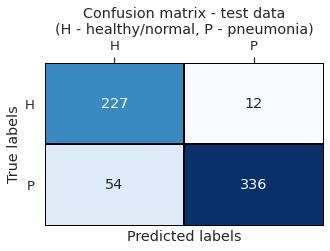

\performance metrics ----------------------
Accuracy: 89.50715421303657%
Precision: 96.55172413793103%
Recall: 86.15384615384616%
F1-score: 91.0569105691057

TRAIN METRIC ----------------------
Train acc: 98.14


In [31]:
# threshold greater than 0.96
summary_pred(test_features,test_targets,0.9997)

threshold greater than 0.955 has better accuracy, and F1-score and doesnot overvit too much, therefore I would like to chose this threshold rather than 0.5

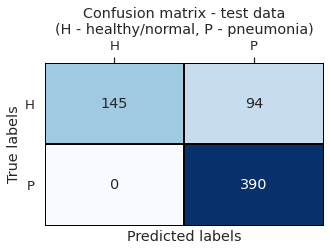

\performance metrics ----------------------
Accuracy: 85.05564387917329%
Precision: 80.57851239669421%
Recall: 100.0%
F1-score: 89.24485125858122

TRAIN METRIC ----------------------
Train acc: 98.14


In [35]:
# threshold greater than 0.0015
summary_pred(test_features,test_targets,0.0015)

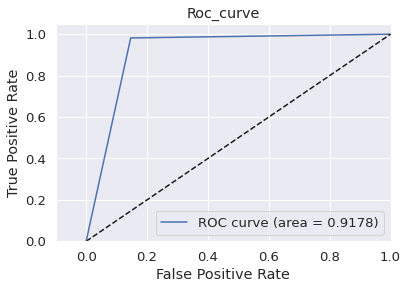

In [37]:
preds = model.predict(test_features)
from sklearn.metrics import auc,roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(test_targets,preds>0.5)
auc = roc_auc_score(test_targets, preds>0.5)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr,label='ROC curve (area = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc_curve')
plt.legend(loc="lower right")
plt.show()

Threshold greater than 0.40 is better on reducing false negative

# Saliency Maps

In [38]:
# size=(224,224)
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def 

Pneumonia

Pneumonia
[[0.9997004]]


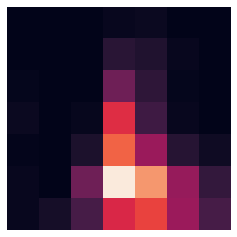

In [40]:
img_path='/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/PNEUMONIA/person10_virus_35.jpeg'
last_conv_layer_name='conv5_block32_concat'
# last_conv_layer_name='separable_conv2d_9'

# Prepare image
img_size=(224,224)
img_array = get_img_array(img_path, size=img_size)
img_array=img_array/255
# Make model
# model = model(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# # Print what the top predicted class is
preds = model.predict(img_array)
if preds>0.5:
    print('Pneumonia')
else:
    print('Normal')
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

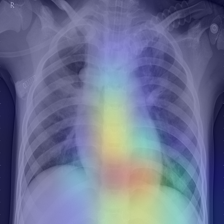

In [41]:
import matplotlib.cm as cm
def gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img
sup_img=gradcam(img_path, heatmap)
new_image = sup_img.resize((224, 224))
new_image

Pneumonia
[[1.]]


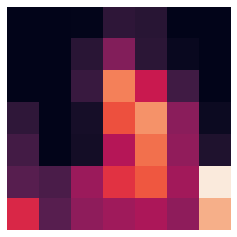

In [42]:
img_path='/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg'
last_conv_layer_name='conv5_block32_concat'
# last_conv_layer_name='separable_conv2d_9'

# Prepare image
img_size=(224,224)
img_array = get_img_array(img_path, size=img_size)
img_array=img_array/255
# Make model
# model = model(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# # Print what the top predicted class is
preds = model.predict(img_array)
if preds>0.955:
    print('Pneumonia')
else:
    print('Normal')
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

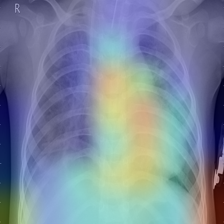

In [43]:
import matplotlib.cm as cm
def gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img
sup_img=gradcam(img_path, heatmap)
new_image = sup_img.resize((224, 224))
new_image

Pneumonia
[[0.9989888]]


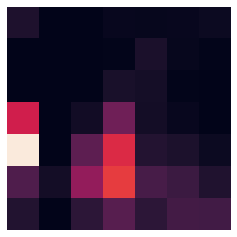

In [44]:
img_path='/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/PNEUMONIA/person1650_virus_2852.jpeg'
last_conv_layer_name='conv5_block32_concat'
# last_conv_layer_name='separable_conv2d_9'

# Prepare image
img_size=(224,224)
img_array = get_img_array(img_path, size=img_size)
img_array=img_array/255
# Make model
# model = model(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# # Print what the top predicted class is
preds = model.predict(img_array)
if preds>0.955:
    print('Pneumonia')
else:
    print('Normal')
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

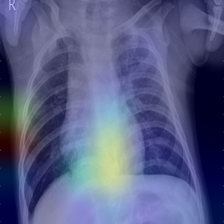

In [45]:
import matplotlib.cm as cm
def gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img
sup_img=gradcam(img_path, heatmap)
new_image = sup_img.resize((224, 224))
new_image

Normal

Normal
[[2.9529792e-05]]


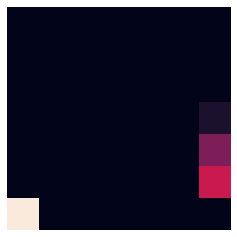

In [46]:
img_path='/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/NORMAL/IM-0007-0001 (1).jpeg'
last_conv_layer_name='conv5_block32_concat'
# last_conv_layer_name='separable_conv2d_9'

# Prepare image
img_size=(224,224)
img_array = get_img_array(img_path, size=img_size)
img_array=img_array/255
# Make model
# model = model(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# # Print what the top predicted class is
preds = model.predict(img_array)
if preds>0.955:
    print('Pneumonia')
else:
    print('Normal')
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

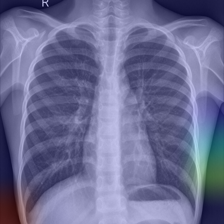

In [47]:
import matplotlib.cm as cm
def gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img
sup_img=gradcam(img_path, heatmap)
new_image = sup_img.resize((224, 224))
new_image

Normal
[[0.00012842]]


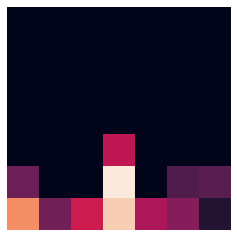

In [48]:
img_path='/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/NORMAL/NORMAL2-IM-0081-0001.jpeg'
last_conv_layer_name='conv5_block32_concat'
# last_conv_layer_name='separable_conv2d_9'

# Prepare image
img_size=(224,224)
img_array = get_img_array(img_path, size=img_size)
img_array=img_array/255
# Make model
# model = model(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# # Print what the top predicted class is
preds = model.predict(img_array)
if preds>0.955:
    print('Pneumonia')
else:
    print('Normal')
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

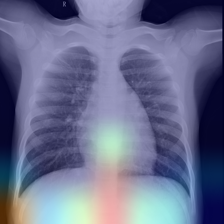

In [49]:
import matplotlib.cm as cm
def gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img
sup_img=gradcam(img_path, heatmap)
new_image = sup_img.resize((224, 224))
new_image

Normal
[[6.943211e-09]]


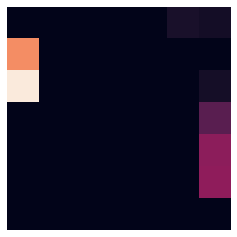

In [50]:
img_path= '/content/gdrive/MyDrive/Pneumonia_normal_image_paul/chest_xray/test/NORMAL/NORMAL2-IM-0351-0001.jpeg'
last_conv_layer_name='conv5_block32_concat'
# last_conv_layer_name='separable_conv2d_9'

# Prepare image
img_size=(224,224)
img_array = get_img_array(img_path, size=img_size)
img_array=img_array/255
# Make model
# model = model(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# # Print what the top predicted class is
preds = model.predict(img_array)
if preds>0.955:
    print('Pneumonia')
else:
    print('Normal')
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

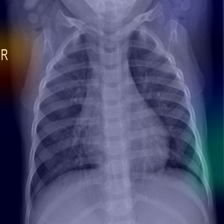

In [51]:
import matplotlib.cm as cm
def gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img
sup_img=gradcam(img_path, heatmap)
new_image = sup_img.resize((224, 224))
new_image

# NIH Dataset

In [52]:
size = 224
val_data = []
#create import function 
def image_import (img_path, class_type, appended_list):
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
        try:
            img = cv2.imread(read_path)
            img = cv2.resize(img, (size, size))
            appended_list.append([img, class_type])
        except Exception as e:
            print(f'Image error: {i}')
            pass
#import normal lung images
img_path = '/content/gdrive/MyDrive/NIH_subset/normal'
image_import(img_path, 0, val_data)
#import pneumonia images
img_path = '/content/gdrive/MyDrive/NIH_subset/pneumonia'
image_import(img_path,1, val_data)
random.shuffle(val_data)

In [53]:
#seperate XY
features = []
targets = []

for f, t in val_data:
    features.append(f)
    targets.append(t)

X = np.array(features).reshape(-1, size, size, 3)
Y = np.array(targets)
X=X/255

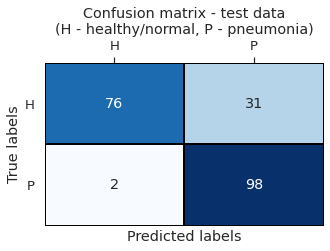

\performance metrics ----------------------
Accuracy: 84.05797101449275%
Precision: 75.96899224806202%
Recall: 98.0%
F1-score: 85.58951965065502

TRAIN METRIC ----------------------
Train acc: 98.14


In [54]:
# threshold greater than 0.5
summary_pred(X,Y,0.5)

Performane Metrics

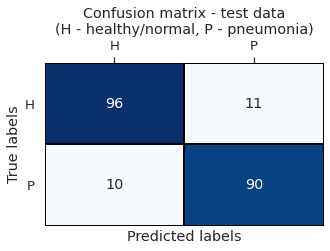

\performance metrics ----------------------
Accuracy: 89.85507246376811%
Precision: 89.10891089108911%
Recall: 90.0%
F1-score: 89.55223880597015

TRAIN METRIC ----------------------
Train acc: 98.14


In [55]:
# threshold greater than 0.9985
summary_pred(X,Y,0.9985)

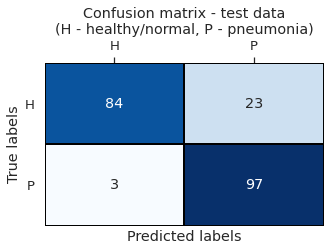

\performance metrics ----------------------
Accuracy: 87.43961352657004%
Precision: 80.83333333333333%
Recall: 97.0%
F1-score: 88.18181818181819

TRAIN METRIC ----------------------
Train acc: 98.14


In [56]:
# threshold greater than 0.75
summary_pred(X,Y,0.75)

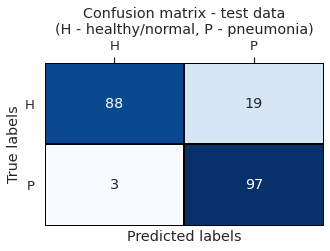

\performance metrics ----------------------
Accuracy: 89.3719806763285%
Precision: 83.62068965517241%
Recall: 97.0%
F1-score: 89.81481481481481

TRAIN METRIC ----------------------
Train acc: 98.14


In [57]:
# threshold greater than 0.9985
summary_pred(X,Y,0.85)

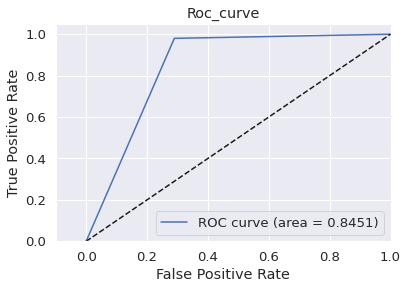

In [58]:
preds = model.predict(X)
from sklearn.metrics import auc,roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(Y,preds>0.5)
auc = roc_auc_score(Y, preds>0.5)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr,label='ROC curve (area = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc_curve')
plt.legend(loc="lower right")
plt.show()

Pneumonia
[[0.75833064]]


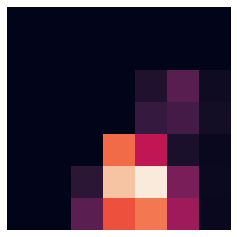

In [60]:
img_path= '/content/gdrive/MyDrive/NIH_subset/normal/00000040_000.png'
last_conv_layer_name='conv5_block32_concat'
# last_conv_layer_name='separable_conv2d_9'

# Prepare image
img_size=(224,224)
img_array = get_img_array(img_path, size=img_size)
img_array=img_array/255
# Make model
# model = model(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# # Print what the top predicted class is
preds = model.predict(img_array)
if preds>0.5:
    print('Pneumonia')
else:
    print('Normal')
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.axis('off')
plt.show()

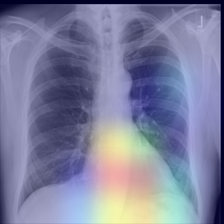

In [61]:
import matplotlib.cm as cm
def gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img
sup_img=gradcam(img_path, heatmap)
new_image = sup_img.resize((224, 224))
new_image

NIH other position view

normal AP (Anterior Posterior)

pneumona PA (posterior Anterior)

In [62]:
other_image=[]
#import normal lung images
img_path = '/content/gdrive/MyDrive/NIH_other_position/normal'
image_import(img_path, 0, other_image)
#import pneumonia images
img_path = '/content/gdrive/MyDrive/NIH_other_position/pneumonia'
image_import(img_path,1, other_image)
random.shuffle(other_image)

In [63]:
np.shape(other_image)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(35, 2)

In [64]:
#seperate XY
features = []
targets = []

for f, t in other_image:
    features.append(f)
    targets.append(t)

data = np.array(features).reshape(-1, size, size, 3)
labels = np.array(targets)
data=data/255

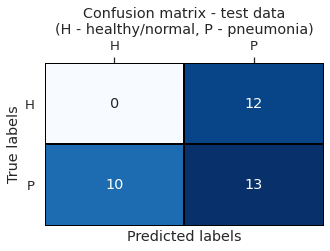

\performance metrics ----------------------
Accuracy: 37.142857142857146%
Precision: 52.0%
Recall: 56.52173913043478%
F1-score: 54.166666666666664

TRAIN METRIC ----------------------
Train acc: 98.14


In [65]:
summary_pred(data,labels,0.5)

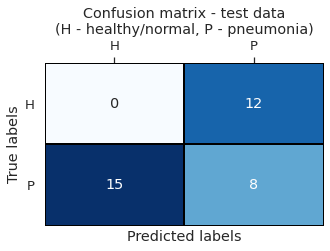

\performance metrics ----------------------
Accuracy: 22.857142857142858%
Precision: 40.0%
Recall: 34.78260869565217%
F1-score: 37.2093023255814

TRAIN METRIC ----------------------
Train acc: 98.14


In [66]:
summary_pred(data,labels,0.988999999999)